In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#plt.style.use('/Users/paolostornati/Phd/phdthesis.mpltstyle')
niceblack="#262626"
from matplotlib.colors import ListedColormap
#from palettable.cartocolors.sequential import DarkMint_7
#import palettable
#cmap = ListedColormap(DarkMint_7.mpl_colors)
#colors_mint = cmap.colors


/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [31]:
def filter_max_bondD(df):
    df = df.sort_values(by=['bondD'], ascending=False)
    df = df.reset_index()  # make sure indexes pair with number of rows
    data = []
    matching_attributes = ["Lx","lambda","mu_y","theta"]
    for index, row in df.iterrows():
        row_is_in_data=False
        for d in data:
            count = 0
            for key in matching_attributes:
                #print(key,d[key],row[key])
                if d[key]==row[key]:
                    count +=1
                else:
                    break

            #print(" ")
            if count == len(matching_attributes):
                row_is_in_data=True
                break

        if not row_is_in_data:
            data.append(row)
    return data

In [46]:
df = pd.read_csv(r'scan_zero_mu.dat' , delimiter='  ', skip_blank_lines=True)
data = filter_max_bondD(df)
#df = df.sort_values(by=['bondD'], ascending=False)
df = pd.DataFrame(data[1:])
df = df.drop(columns="index")
#print(len(data))
#print(len(df))
df



/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Lx,lambda,mu_y,theta,bondD,Energy_GS,winding,eA,eB,MA,MB,U4,Oflip,Oflipp,charge
1,31.0,-0.28,0.0,0.0,160.0,-45.789549,-4.158900,20.624715,20.624715,-6.114780,-6.114780,0.983838,41.249429,-0.0,-0.0
2,31.0,-0.07,0.0,0.0,160.0,-37.727336,-1.796928,19.715229,19.715229,3.854523,3.854523,0.983093,39.430459,-0.0,0.0
3,31.0,-0.33,0.0,0.0,160.0,-47.864846,-4.825764,20.883823,20.883823,6.906000,6.906000,0.984039,41.767647,0.0,0.0
5,31.0,-0.05,0.0,0.0,160.0,-36.744158,-1.528404,19.612185,19.612185,3.649154,3.649154,0.983004,39.224370,-0.0,-0.0
6,31.0,-0.35,0.0,0.0,160.0,-48.912411,-5.173556,21.019493,21.019493,-7.342555,-7.342555,0.984142,42.038987,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,23.0,0.53,0.0,0.0,48.0,-8.733299,3.222294,9.559405,9.559405,-0.789102,-0.789102,0.965130,19.118809,0.0,0.0
619,23.0,0.55,0.0,0.0,48.0,-8.258782,3.390717,9.537052,9.537052,-0.456235,-0.456235,0.965049,19.074104,-0.0,-0.0
652,15.0,0.55,0.0,0.0,32.0,-4.925624,2.863186,5.618242,5.618242,-0.334293,-0.334293,0.940669,11.236484,-0.0,0.0
664,15.0,0.45,0.0,0.0,32.0,-6.781795,1.748775,6.441104,6.441104,-0.042384,-0.042384,0.948249,12.882207,-0.0,-0.0


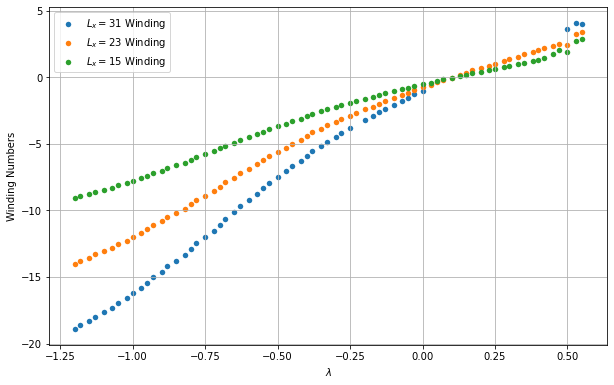

In [52]:
qtty = "lambda"
plt.figure(figsize=(10,10/1.61))
plt.scatter(df[(df['Lx']==31)][qtty], df[(df['Lx']==31)]['winding'], lw=0,marker='o',s=30, label= r'$L_x=31$ Winding')
plt.scatter(df[(df['Lx']==23)][qtty], df[(df['Lx']==23)]['winding'], lw=0,marker='o',s=30, label= r'$L_x=23$ Winding')
#plt.plot(df[(df['Lx']==10)]['mu_y'], df[(df['Lx']==10)]['winding'], lw=0,marker='X', label= 'Lx=10 Winding')
plt.scatter(df[(df['Lx']==15)][qtty], df[(df['Lx']==15)]['winding'], lw=0,marker='o',s=30, label= r'$L_x=15$ Winding')
plt.grid()
plt.ylabel('Winding Numbers')
plt.xlabel(r'$\lambda$')
plt.legend()
#plt.savefig("/Users/paolostornati/Desktop/Talks/LATTICE_2021/Lambda_1_winding.png", format="png", dpi=300)

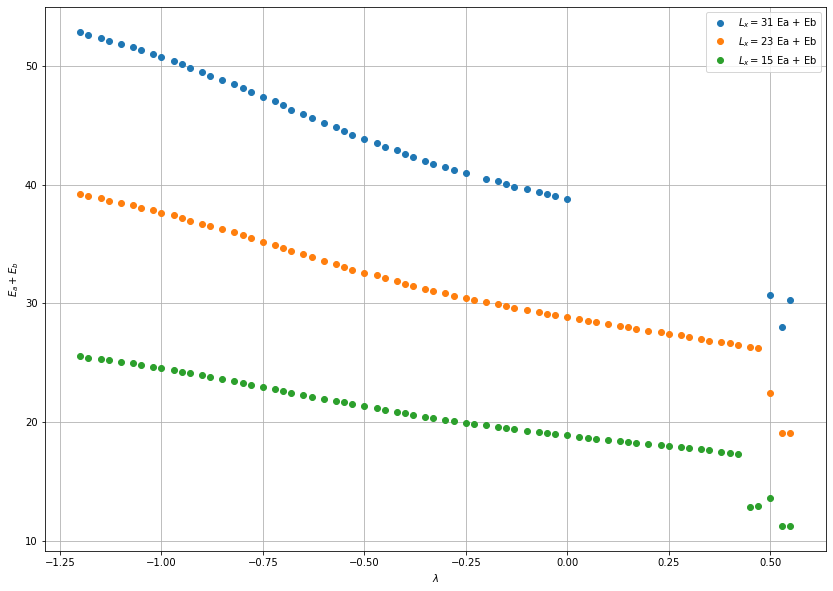

In [60]:
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==31)][qtty], df[(df['Lx']==31)]['eA']+df[(df['Lx']==31)]['eB'], lw=0,marker='o', label= r'$L_x=31$ Ea + Eb' )    
plt.plot(df[(df['Lx']==23)][qtty],  df[(df['Lx']==23)]['eA']+df[(df['Lx']==23)]['eB'], lw=0,marker='o', label= r'$L_x=23$ Ea + Eb' ) 
plt.plot(df[(df['Lx']==15)][qtty],  df[(df['Lx']==15)]['eA']+df[(df['Lx']==15)]['eB'], lw=0,marker='o', label= r'$L_x=15$ Ea + Eb' ) 
plt.grid()
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E_a+E_b$")
plt.legend()

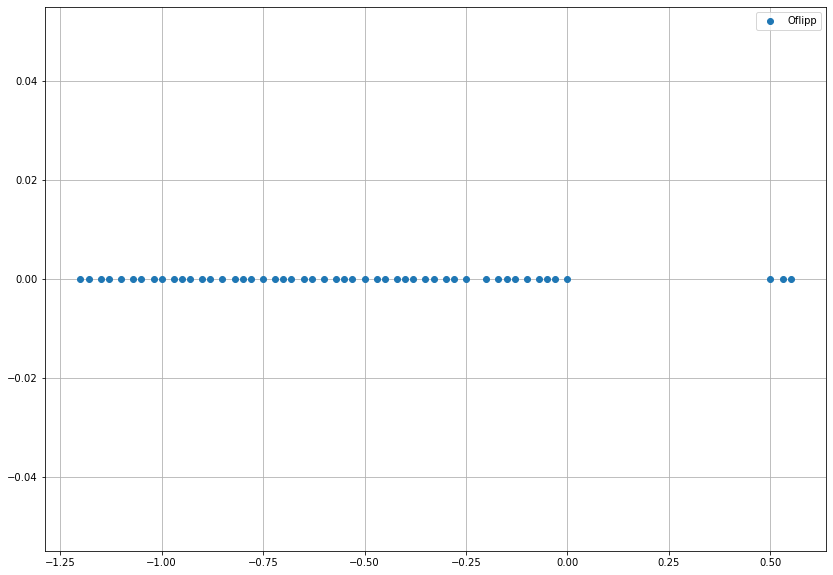

In [62]:
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==31)][qtty], df[(df['Lx']==31)]['Oflipp'], lw=0,marker='o', label = 'Oflipp')
#plt.plot(df[(df['Lx']==31)][qtty], df[(df['Lx']==31)]['winding'], lw=0,marker='o', label = 'winding')
plt.grid()
plt.legend()
#np.diff(df[(df['Lx']==16)]['winding'])

#plt.plot(df[(df['Lx']==12)]['mu_y'], df[(df['Lx']==12)]['Oflipp'], lw=0,marker='o')
#plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['Oflipp'], lw=0,marker='o')

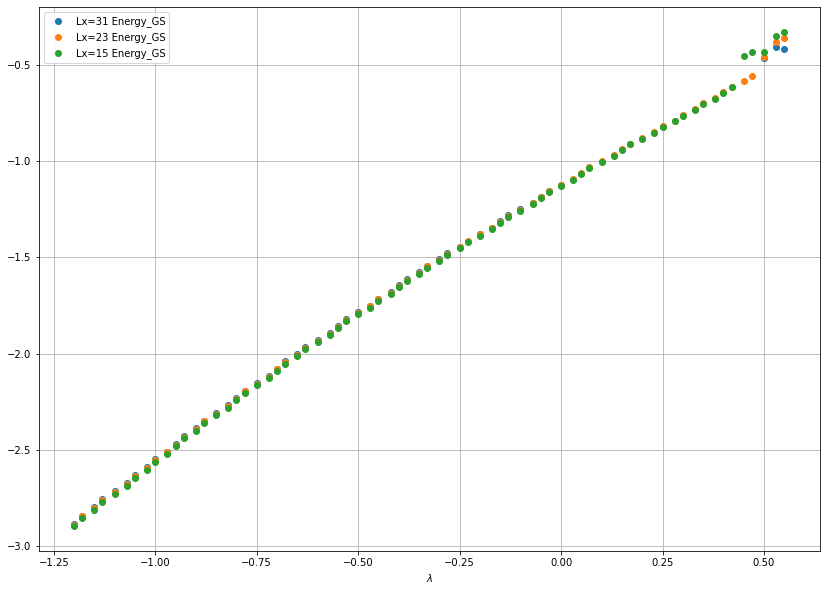

In [66]:
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==31)][qtty], df[(df['Lx']==31)]['Energy_GS']/31, lw=0,marker='o', label= 'Lx=31 Energy_GS')
plt.plot(df[(df['Lx']==23)][qtty], df[(df['Lx']==23)]['Energy_GS']/23, lw=0,marker='o', label= 'Lx=23 Energy_GS')
plt.plot(df[(df['Lx']==15)][qtty], df[(df['Lx']==15)]['Energy_GS']/15, lw=0,marker='o', label= 'Lx=15 Energy_GS')
plt.xlabel(r"$\lambda$")
plt.grid()
plt.legend()

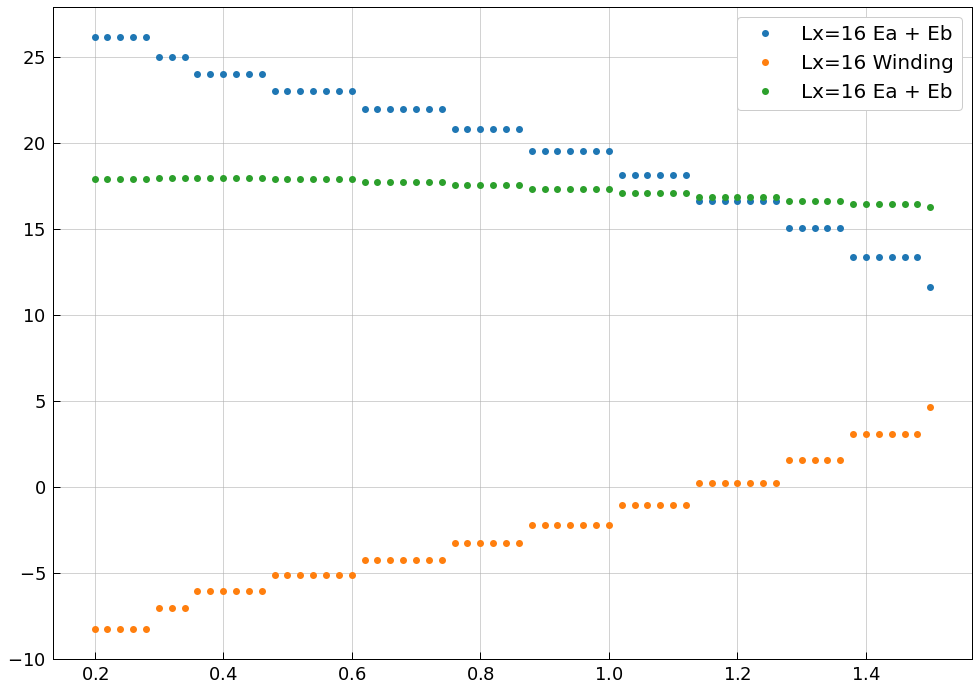

In [12]:
plt.figure(figsize=(14,10))

plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB'], lw=0,marker='o', label= 'Lx=16 Ea + Eb' )    
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['winding'], lw=0,marker='o', label= 'Lx=16 Winding')

plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB']+df[(df['Lx']==16)]['winding'], lw=0,marker='o', label= 'Lx=16 Ea + Eb' )    


plt.grid()
plt.legend()


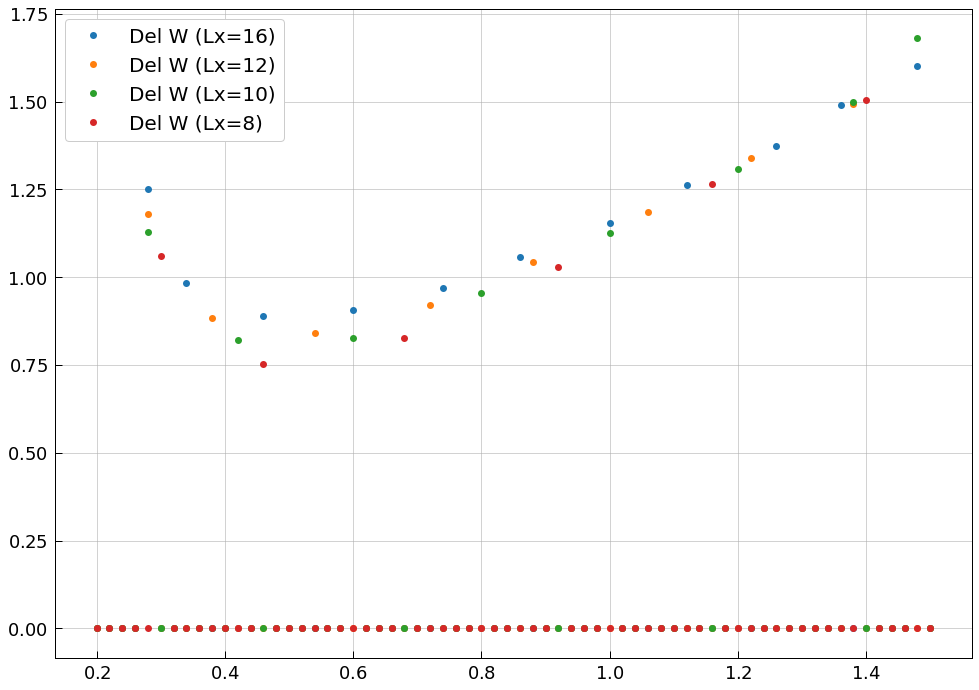

In [13]:
plt.figure(figsize=(14,10))
differences_16= list(np.diff(df[(df['Lx']==16)]['winding']))
differences_16.append(0)

differences_12= list(np.diff(df[(df['Lx']==12)]['winding']))
differences_12.append(0)

differences_10= list(np.diff(df[(df['Lx']==10)]['winding']))
differences_10.append(0)

differences_8= list(np.diff(df[(df['Lx']==8)]['winding']))
differences_8.append(0)

#plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16/df[(df['Lx']==16)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=16)')
#plt.plot(df[(df['Lx']==12)]['mu_y'], differences_12/df[(df['Lx']==12)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=12)')
#plt.plot(df[(df['Lx']==10)]['mu_y'], differences_10/df[(df['Lx']==10)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=10)')
#plt.plot(df[(df['Lx']==8)]['mu_y'], differences_8/df[(df['Lx']==8)]['mu_y'], lw=0,marker='o', label = 'dW/dMu (Lx=8)')

plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16, lw=0,marker='o', label = 'Del W (Lx=16)')
plt.plot(df[(df['Lx']==12)]['mu_y'], differences_12, lw=0,marker='o', label = 'Del W (Lx=12)')
plt.plot(df[(df['Lx']==10)]['mu_y'], differences_10, lw=0,marker='o', label = 'Del W (Lx=10)')
plt.plot(df[(df['Lx']==8)]['mu_y'], differences_8, lw=0,marker='o', label = 'Del W (Lx=8)')

plt.grid()
plt.legend()


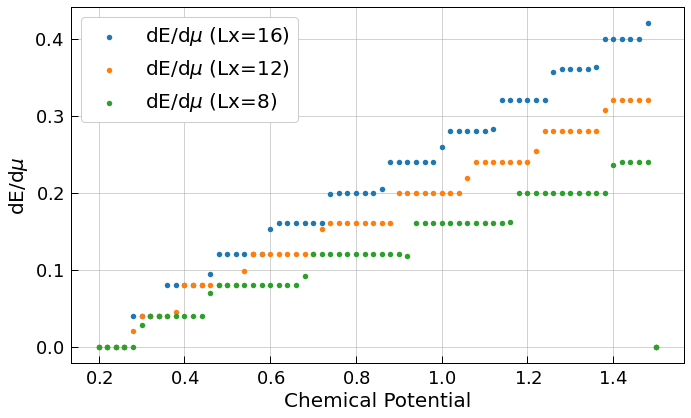

In [15]:
plt.figure(figsize=(10,10/1.61))
dE_L16= list(-np.diff(df[(df['Lx']==16)]['Energy_GS']))
dE_L16.append(0)
dE_L12= list(-np.diff(df[(df['Lx']==12)]['Energy_GS']))
dE_L12.append(0)
dE_L10= list(-np.diff(df[(df['Lx']==10)]['Energy_GS']))
dE_L10.append(0)
dE_L8= list(-np.diff(df[(df['Lx']==8)]['Energy_GS']))
dE_L8.append(0)



plt.scatter(df[(df['Lx']==16)]['mu_y'], dE_L16, lw=0,marker='o',s=30, label = r'dE/d$\mu$ (Lx=16)')
plt.scatter(df[(df['Lx']==12)]['mu_y'], dE_L12, lw=0,marker='o',s=30, label = r'dE/d$\mu$ (Lx=12)')
#plt.scatter(df[(df['Lx']==10)]['mu_y'], dE_L10, lw=0,marker='p', label = 'dE/dMu (Lx=10)')
plt.scatter(df[(df['Lx']==8)]['mu_y'], dE_L8, lw=0,marker='o',s=30, label = r'dE/d$\mu$ (Lx=8)')

plt.ylabel(r'dE/d$\mu$')
plt.xlabel('Chemical Potential')

plt.grid()
plt.legend()
plt.savefig("/Users/paolostornati/Desktop/Talks/LATTICE_2021/Lambda_1_dE_dMu.png", format="png", dpi=300)



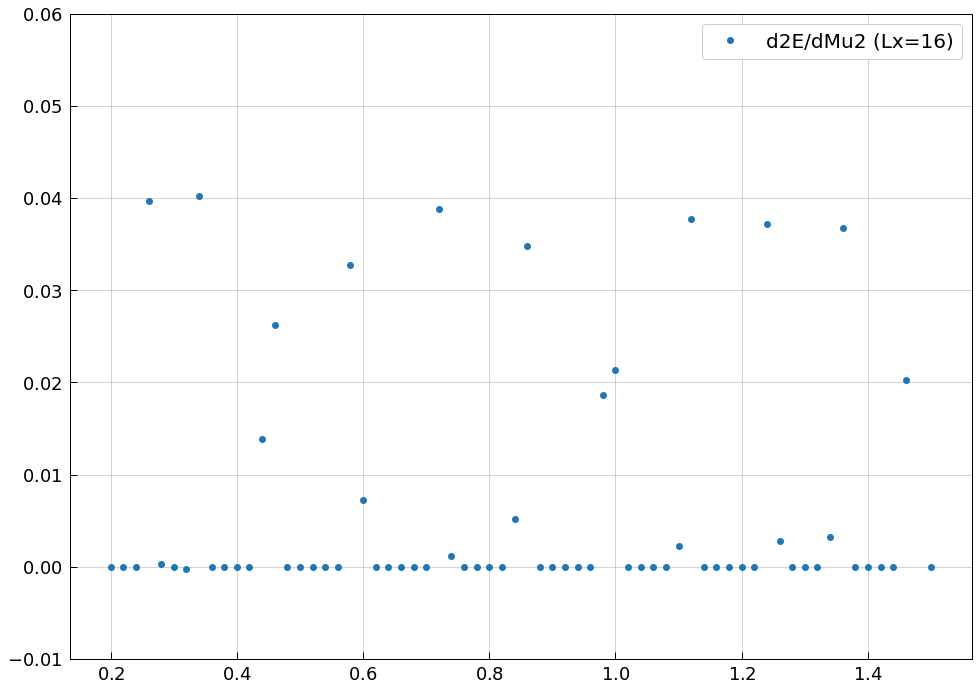

In [16]:
plt.figure(figsize=(14,10))
d2E_L16= list(np.diff(dE_L16))
d2E_L16.append(0)
plt.ylim([-0.01,0.06])
plt.plot(df[(df['Lx']==16)]['mu_y'], d2E_L16, lw=0,marker='o', label = 'd2E/dMu2 (Lx=16)')
plt.grid()
plt.legend()
#dE_L12= list(-np.diff(df[(df['Lx']==12)]['Energy_GS']))
#dE_L12.append(0)
#dE_L10= list(-np.diff(df[(df['Lx']==10)]['Energy_GS']))
#dE_L10.append(0)
#dE_L8= list(-np.diff(df[(df['Lx']==8)]['Energy_GS']))
#dE_L8.append(0)


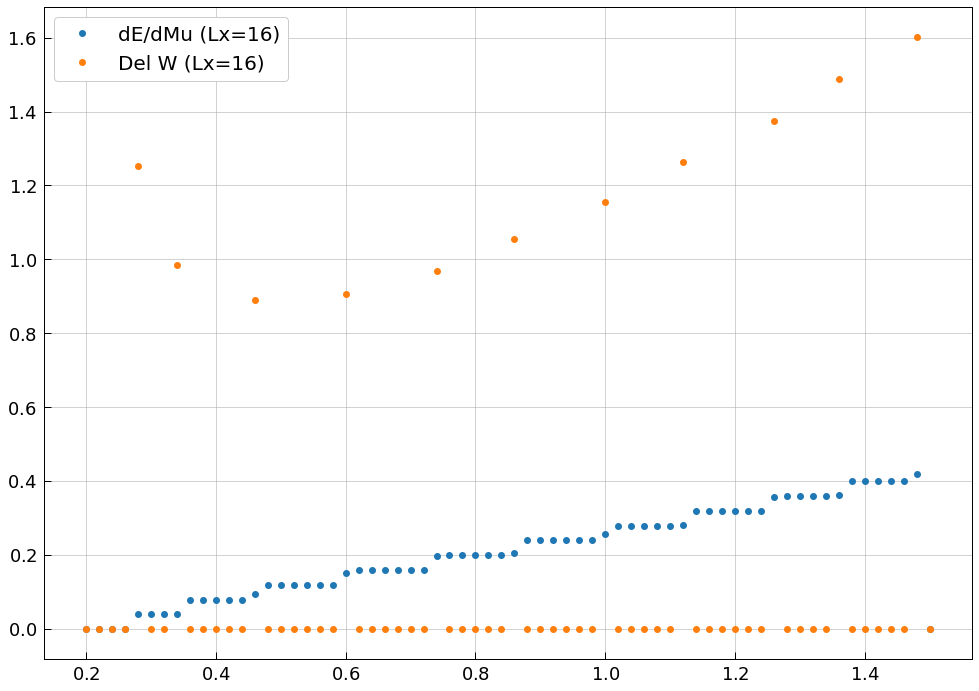

In [17]:
newL = [i * 16 for i in dE_L16]
plt.figure(figsize=(14,10))
plt.plot(df[(df['Lx']==16)]['mu_y'], dE_L16, lw=0,marker='o', label = 'dE/dMu (Lx=16)')
plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16, lw=0,marker='o', label = 'Del W (Lx=16)')
plt.grid()
plt.legend()

In [18]:
newL = [i * 16 for i in dE_L16] 

In [19]:
differences_16 = np.array(differences_16)
mask = differences_16>0

In [20]:
x = np.array(df[(df['Lx']==16)]['mu_y'])

In [21]:
def funzione (x,a,b):
    return a + b *1/(x*x)
    
import scipy.optimize as optimization

In [22]:
fit_result=optimization.curve_fit(funzione, x[mask], differences_16[mask]/x[mask])
a,b=fit_result[0][0],fit_result[0][1]
print(a,b)
print(fit_result)

0.8690950525626017 0.2630259488665156
(array([0.86909505, 0.26302595]), array([[ 0.00320908, -0.00041399],
       [-0.00041399,  0.00012824]]))


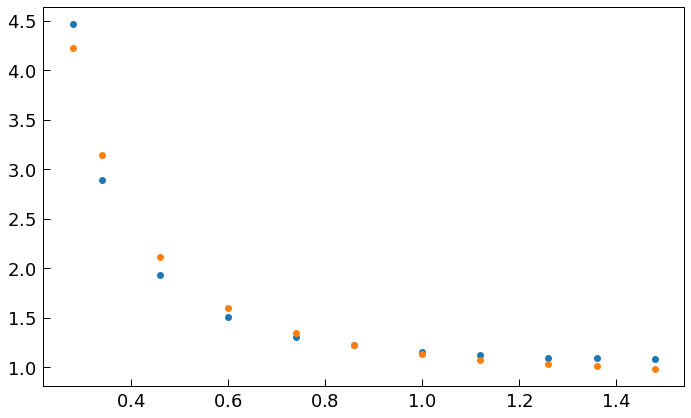

In [23]:

plt.plot(x[mask], differences_16[mask]/x[mask],'o')
plt.plot(x[mask], funzione(x[mask],a,b),'o')




    